In [112]:
# Important Statements
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [113]:
dataset = pd.read_csv("bank-additional-full.csv")
dataset = dataset.drop(['emp.var.rate','nr.employed', 'duration'], axis=1)

In [114]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

In [115]:
dataset.shape

(41188, 18)

In [116]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [117]:
#Initial data prep
#check for null values
#dataset.isnull().values.any()
#remove rows with >= 4 unkown values
#dataset = dataset.replace(to_replace='unknown', value=np.nan).dropna(thresh=17)
#dataset = dataset.replace(to_replace='unknown', value=np.nan).dropna()
#dataset = dataset.replace(to_replace=np.nan, value='unknown')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
y                 41188 non-null object
dtypes: float64(3), int64(4), object(11)
memory usage: 5.7+ MB


In [118]:
#One Hot Encoding all Catergorical Variables without Order
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['job','marital','education','default','housing','loan','contact','poutcome','month','day_of_week'])
dataset = encoder.fit_transform(dataset)

In [119]:
# Encoding Outcome Row to Binary
#dataset['outcome'] = dataset['outcome'].map({'yes': 1, 'no': 0})
dataset['y'] = dataset['y'].map({'yes': 1, 'no': 0})

In [120]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 43 columns):
age               41188 non-null int64
job_0             41188 non-null int64
job_1             41188 non-null int64
job_2             41188 non-null int64
job_3             41188 non-null int64
job_4             41188 non-null int64
marital_0         41188 non-null int64
marital_1         41188 non-null int64
marital_2         41188 non-null int64
education_0       41188 non-null int64
education_1       41188 non-null int64
education_2       41188 non-null int64
education_3       41188 non-null int64
default_0         41188 non-null int64
default_1         41188 non-null int64
default_2         41188 non-null int64
housing_0         41188 non-null int64
housing_1         41188 non-null int64
housing_2         41188 non-null int64
loan_0            41188 non-null int64
loan_1            41188 non-null int64
loan_2            41188 non-null int64
contact_0         41188 non-null 

In [121]:
dataset.shape

(41188, 43)

In [122]:
# Defining Dependent and Independent values
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,-1].values 

In [123]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [124]:
# Scaling
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [133]:
from sklearn.tree import DecisionTreeClassifier

classifierObj = DecisionTreeClassifier()
#grid_param= {
#    'min_samples_split' : range(10,500,20),
#    'max_depth': range(1,20,2),
#    'criterion': ['gini', 'entropy'],  
#}
#from sklearn.model_selection import GridSearchCV
#gd_sr= GridSearchCV(estimator=classifierObj, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
#gd_sr.fit(X_train, y_train) 
#print(gd_sr.best_params_) 
#print(gd_sr.best_score_)
#results of grid search: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 150}
#0.9141729893778452

classifierObj = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=150)
classifierObj.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=150,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [126]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print(modelAccuracies.mean())
print(modelAccuracies.std())

0.8994491816111081
0.005115340573207742


In [127]:
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10779   190]
 [ 1038   350]]


In [128]:
score = classifierObj.score(X_test, y_test)
print(score)

0.900623128591082


In [129]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
#print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.900623128591082
The null acccuracy is: 0.8876750020231448


Index(['age', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'marital_0',
       'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2',
       'education_3', 'default_0', 'default_1', 'default_2', 'housing_0',
       'housing_1', 'housing_2', 'loan_0', 'loan_1', 'loan_2', 'contact_0',
       'contact_1', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'campaign', 'pdays', 'previous', 'poutcome_0', 'poutcome_1',
       'poutcome_2', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'],
      dtype='object')


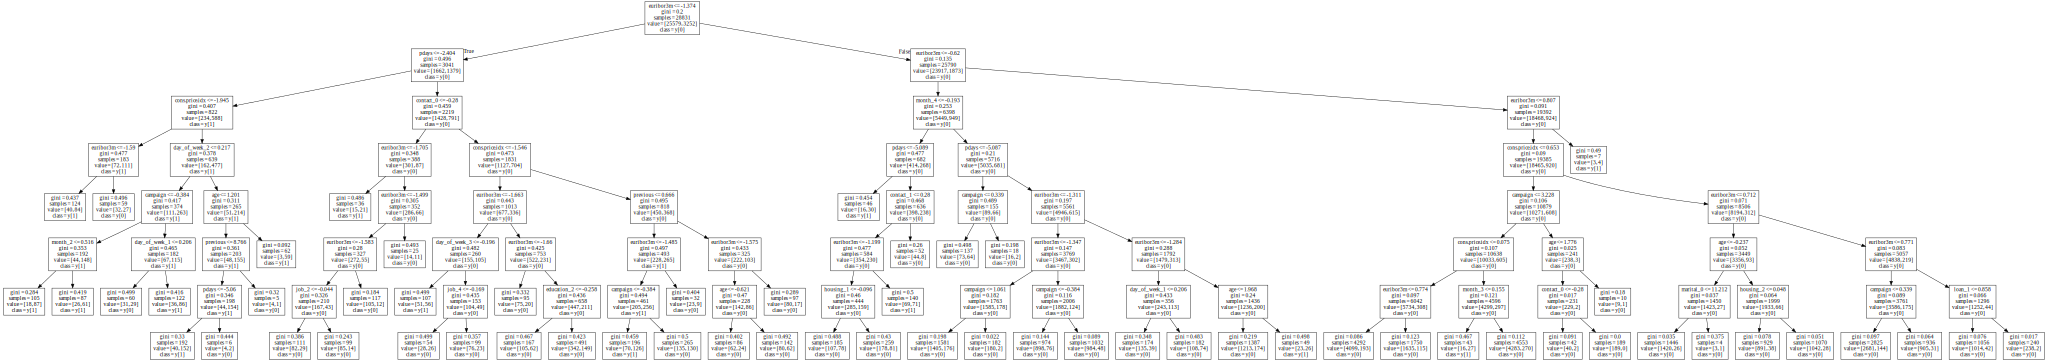

In [131]:
from graphviz import Source
from sklearn import tree
class_names = dataset.columns[:-1]
print(class_names)
feature_names = dataset.columns[:-1]
Source( tree.export_graphviz(classifierObj, out_file=None, feature_names=class_names, class_names=True))
graph = Source( tree.export_graphviz(classifierObj, out_file=None, feature_names=class_names, class_names=True))
graph.format = 'png'
graph.render('dtree_render',view=True)
from IPython.display import SVG
graph = Source( tree.export_graphviz(classifierObj, out_file=None, feature_names=class_names, class_names=True))
SVG(graph.pipe(format='svg'))